# Template matching

# Import libraries and files

In [2]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

#photometry path and file
FOLDER_PATH = '/home/li/Documents/Template_matching/Photometry/'

#Using photometry sessions from 9 different mice
FOLDER_NAME = []
FOLDER_NAME.append('159459-R-221006-091824')
FOLDER_NAME.append('159459-L-221020-102241')
FOLDER_NAME.append('159459-BL-221018-091752')
FOLDER_NAME.append('151653-R-221005-112408')
FOLDER_NAME.append('151653-L-221019-114353')
FOLDER_NAME.append('151653-RR-221012-102704')
FOLDER_NAME.append('151652-L-221011-091017')
FOLDER_NAME.append('151652-RR-221018-121215')
FOLDER_NAME.append('151653-LL-221101-100649')
tpath=len(FOLDER_NAME)

print("FOLDER_NAME: ", FOLDER_NAME)
BLOCK_PATH = []
for i in range(tpath):
    BLOCK_PATH.append(FOLDER_PATH + FOLDER_NAME[i])
#end for i

#Path to videos
VIDEO_PATH = []
VIDEO_PATH.append(BLOCK_PATH[0]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[1]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[2]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[3]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[4]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[5]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[6]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[7]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[8]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1.avi')

#Behavior Deeplabcut file
BEHAVE_PATH = '/home/li/Documents/Template_matching/DLC/'
BEHAVE_NAME = []
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')

print("\033[1m", tpath, " Experiments: "+"\033[0m")
for i in range(tpath):
    print(i+1,".", FOLDER_NAME[i])
print("Done")


FOLDER_NAME:  ['159459-R-221006-091824', '159459-L-221020-102241', '159459-BL-221018-091752', '151653-R-221005-112408', '151653-L-221019-114353', '151653-RR-221012-102704', '151652-L-221011-091017', '151652-RR-221018-121215', '151653-LL-221101-100649']
 9  Experiments: 
1 . 159459-R-221006-091824
2 . 159459-L-221020-102241
3 . 159459-BL-221018-091752
4 . 151653-R-221005-112408
5 . 151653-L-221019-114353
6 . 151653-RR-221012-102704
7 . 151652-L-221011-091017
8 . 151652-RR-221018-121215
9 . 151653-LL-221101-100649
Done


In [18]:
#If prior saved arrays exist, can import them here

PATH = '/home/li/Documents/Template_matching/Archived/'
event_times=np.load(PATH+"20241220_event_init.npy")
event2_times=np.load(PATH+"20241220_event_arrest.npy")
behave_time = np.load(PATH+"20241220_behave_time.npy")
marker_dist=np.load(PATH+"20241220_dist_markers.npy")
movement_bin = np.load(PATH+"20241220_movement_bin.npy")
all_movement_bin = np.load(PATH+"20241220_all_movement_bin.npy")


In [27]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

baseline_start = 0 # in seconds
baseline_end = 600 #in seconds
dF_F_outlier = 50

#Select mouse
k=1

SELECT_BLOCK_PATH = BLOCK_PATH[k]
SELECT_VIDEO_PATH = VIDEO_PATH[k]
SELECT_BEHAVE_NAME = BEHAVE_NAME[k]
print("\033[1m"+"Mouse "+str(k+1)+": "+FOLDER_NAME[k]+"\033[0m")
print("Importing photometry data...")
data = read_block(SELECT_BLOCK_PATH)

#Define sample size and frequency
data_470 = data.streams._470A.data
data_405 = data.streams._405A.data
size_470 = len(data_470)
size_405 = len(data_405) #isosbestic channel
freq_470 = data.streams._470A.fs #sampling frequency
print("470/405 sampling frequency: ", np.round(freq_470,2))
time_470 = np.linspace(1, size_470, size_470) / freq_470
total_time = time_470[size_470-1]
print("Total time: ", np.round(total_time,2))
fit_window = size_470
print("Done.")

print("Normalizing photometry data...")
#Fit 405 nm trace to 470 nm by applying least-squares fit
#Linear least square fit
Sum_f = 0 #f is 405A
Sum_g = 0 #g is 470A
Sum_fg = 0 # fg is 405A*407A
Sum_fsq = 0 #fsq is f^2 or 405A^2
for i in range(fit_window):
    Sum_f = Sum_f + data_405[i]
    Sum_g = Sum_g + data_470[i]
    Sum_fg = Sum_fg + data_405[i]*data_470[i]
    Sum_fsq = Sum_fsq + (data_405[i])*(data_405[i])
#end for i

#Slope*x + Intercept = y
Slope = (Sum_f*Sum_g - size_470*Sum_fg)/(Sum_f*Sum_f - size_470*Sum_fsq)
Intercept = (Sum_g*Sum_fsq - Sum_f*Sum_fg)/(size_470*Sum_fsq - Sum_f*Sum_f)
print("Least squares fit: y = ", np.round(Slope,3), "*x + ", np.round(Intercept,3))

#initialize fit
Fit_405 = [0 for i in range(size_470)]
dF_F = [0 for i in range(size_470)]
for i in range(size_470):
    Fit_405[i] = Slope*data_405[i] + Intercept
    dF_F[i] = (data_470[i] - Fit_405[i])*100/Fit_405[i]
#end for i
print("Done.")

#Curate
print("Removing outlier...")
count = 0
for i in range(size_470):
    if abs(dF_F[i])>dF_F_outlier:
        dF_F[i] = np.NaN
        count = count + 1
    #endif
#end for i
print("Number of outliers changed to NaN: ", count)
print("Done.")

#Delete beginning poor signal
for i in range(int(freq_470*0.5)):
    dF_F[i]=np.NaN
#endfor i

#Subtract median
print("Subtracting average...")
avg_F = np.nanmean(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
std_F = np.nanstd(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
for i in range(size_470):
     dF_F[i] = (dF_F[i] - avg_F)/std_F
#end for i
print("Done.")   

#Get video information
print("Collecting video information...")
cap = cv2.VideoCapture(SELECT_VIDEO_PATH)
fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frate = cap.get(cv2.CAP_PROP_FPS)
tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
cap.release()
cv2.destroyAllWindows()

#Collect movement time from Deeplabcut csv file
#initialize lists
behave_time=[]
nose_xcoord=[]
nose_ycoord=[]
tailBase_xcoord=[]
tailBase_ycoord=[]

with open(BEHAVE_PATH+SELECT_BEHAVE_NAME) as behave_file:
    reader = csv.reader(behave_file)
    i=0       
    for row in reader:
        if i>2:
            behave_time.append(np.round(int(row[0])/frate,2))
            nose_xcoord.append(np.round(float(row[1]),1))
            nose_ycoord.append(np.round(float(row[2]),1))
            tailBase_xcoord.append(np.round(float(row[10]),1))
            tailBase_ycoord.append(np.round(float(row[11]),1))    
        #endif
        i=i+1
    #endfor
behave_file.close()

#Calculate displacement of each marker
nose_dist = [0]
tailBase_dist = [0]
for i in range(len(behave_time)):
    if i>0:
        nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
        tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
    #endif
#endfor i
print("Done.")

Mouse 2: 159459-L-221020-102241
Importing photometry data...
read from t=0s to t=3182.84s
470/405 sampling frequency:  1017.25
Total time:  3182.85
Done.
Normalizing photometry data...
Least squares fit: y =  1.201 *x +  -37.029
Done.
Removing outlier...
Number of outliers changed to NaN:  224
Done.
Subtracting average...
Done.
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Done.


# Movement onset

Analysis window: [ 2.0 , 1.5 ]
Template array size:  3561
Photometry array size:  305175
Template array size after reduction:  357
Photometry array size after reduction:  30518
Correlation array size: 30161
peaks:  90


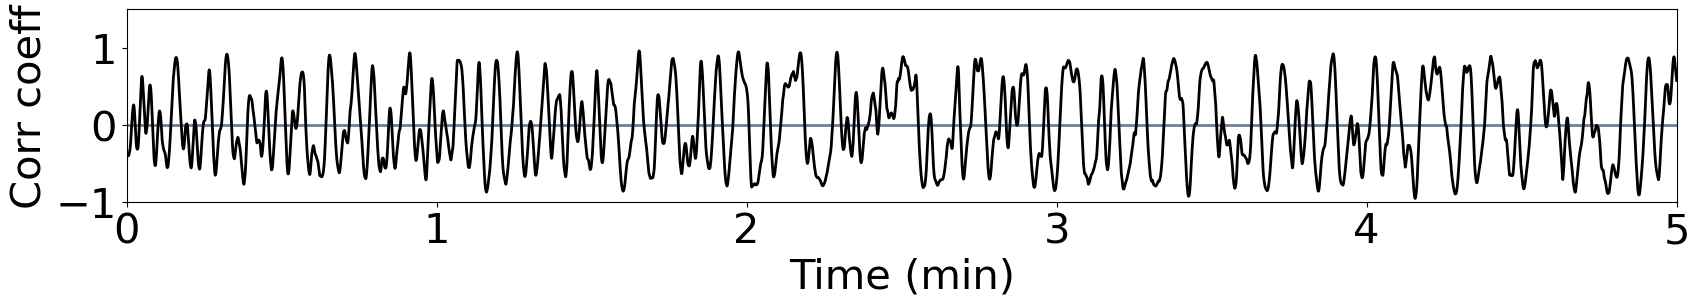

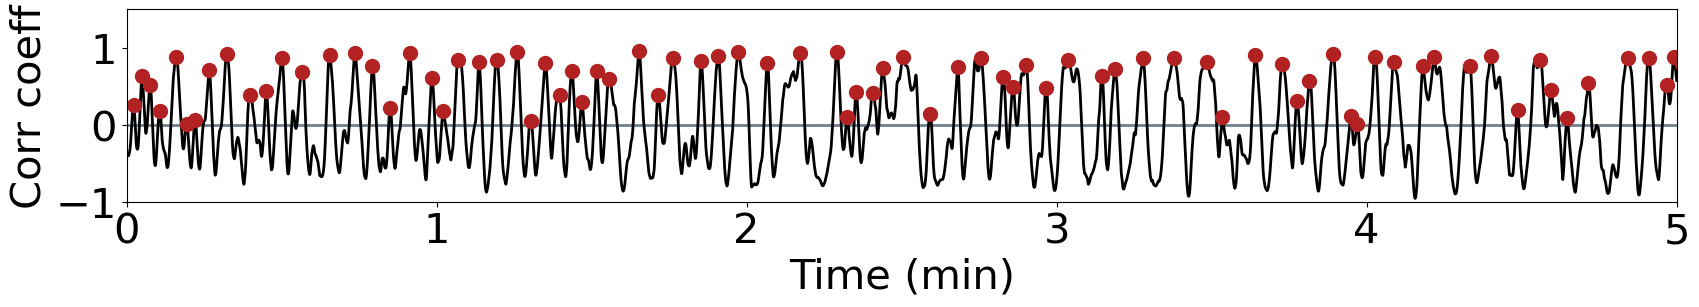

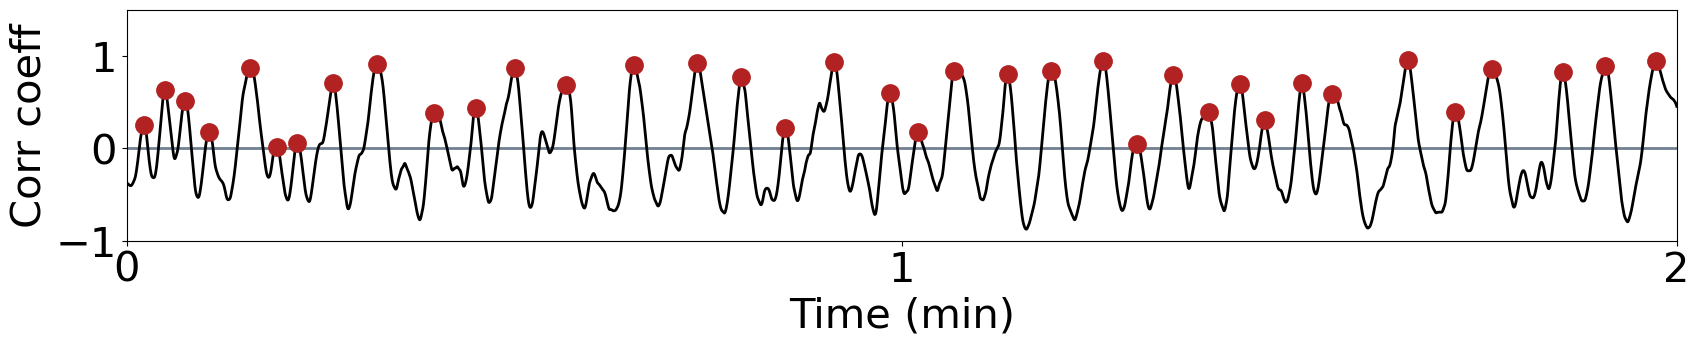

In [66]:
import numpy as np
import scipy.stats  


#Template name should remain the same characters to be read by analysis window
template_name = "/home/li/Documents/Template_matching/20241220_init_template_2_0_1_5.npy"
template = np.load(template_name)
analysis_window = [float(template_name[-11]+'.'+template_name[-9]),float(template_name[-7]+'.'+template_name[-5])]
print("Analysis window: [", analysis_window[0],",", analysis_window[1],"]")
hi_cutoff = 300 #s This is where the template matching stops, so 300 means template runs from 0 to 300s
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("Template array size: ", len(template))
print("Photometry array size: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("Template array size after reduction: ", len(sig1))
print("Photometry array size after reduction: ", len(sig2))

scales = [1] #Scaling will not affect correlation
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Correlation array size:", len(corr_coeff_scaled)) #This should be reduced from photometry array size as the size of template is used to truncate array on both ends

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=100, prominence=0.25)
print("peaks: ", len(peaks))

#shifting time to be compatible with template
temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size] #truncate template size number of elements at the end
#shift to account for truncation for the analysis window
time_data = [x+analysis_window[0] for x in temp]

#Cutoff for peak detection
corr_cutoff=0 
pruned_peaks=[]
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

#Plot parameters
font_size=30
xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1
plot_width = 20
plot_height = 2.5

pruned_peaks_min = [x/6000 for x in pruned_peaks]
time_min = []
for i in range(len(corr_coeff)):
    time_min.append(i/6000)
#endfor i

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=20, color='firebrick')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_photometry_template_crosscorrelate.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Zoomed in plot
xmin=0
xmax=2
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=25, color='firebrick')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_photometry_template_crosscorrelate_zoom_1.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Find the corresponding times to filtered peak events
event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i
np.save("20241220_init_peaks.npy",peaks)
np.save("20241220_init_peaks_corr_coeff.npy",corr_coeff)
np.save("20241220_init_time_data.npy",time_data)
np.save("20241220_init_peak_times.npy",event3_times)

Event-associated movement and photometry signals
Behave mean array 3 size:  150
Activity mean array 3 size:  15258
Plot movement onset...


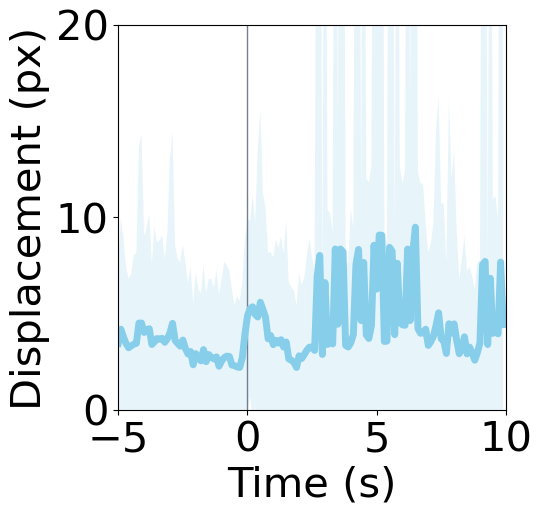

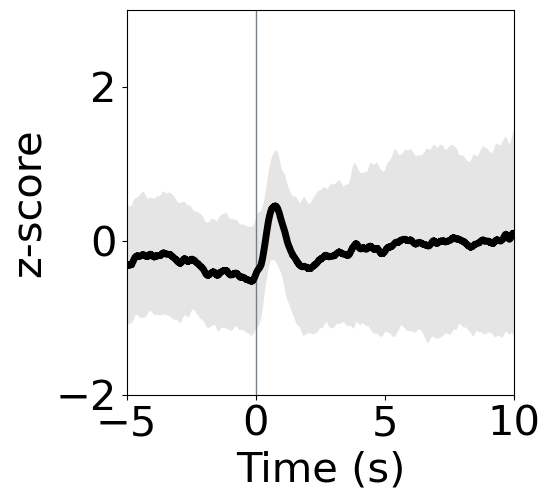

In [50]:
#Photometry and movement traces associated with template-matched events
import numpy as np  # package for scientific computing, handles arrays and math
from operator import add

marker_dist = [nose_dist, tailBase_dist]
pre_window_size = 5 # in second
post_window_size = 10 # in second
print("\033[1m"+"Event-associated movement and photometry signals"+"\033[0m")
behave_mean3_marker1_array = []
activity_mean3_array = []
behave_data3_marker1 = []
activity_data3=[]
behave_interval_time = []
activity_interval_time = []
behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)]) #behave_time
activity_interval=int((pre_window_size+post_window_size)*freq_470) #calculate activity interval
activity_interval_time.append(time_470[0:activity_interval]) #activity_time
behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]] #re-align to 0
activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]] #realign to 0

for j in range(len(event3_times)):
    if(event3_times[j]-pre_window_size>0 and event3_times[j]+post_window_size<behave_time[-1]):
        activity_data3.append(np.around(dF_F[int((event3_times[j]-pre_window_size)*freq_470):int((event3_times[j]+post_window_size)*freq_470-1)],2))
        behave_data3_marker1.append(marker_dist[0][int((event3_times[j]-pre_window_size)*frate):int((event3_times[j]+post_window_size)*frate)])
    #endif
#endfor j

behave_mean3_marker1=[]
behave_std3_marker1=[]
behave_data3_transposed_marker1 = np.transpose(np.array(behave_data3_marker1))
for i in range(len(behave_data3_transposed_marker1)):    
    behave_mean3_marker1.append(np.nanmean(behave_data3_transposed_marker1[i]))
    behave_std3_marker1.append(np.nanstd(behave_data3_transposed_marker1[i]))
#end for i
                
behave_mean3_marker1_array = behave_mean3_marker1
behave_std3_marker1_array = behave_std3_marker1
  
print("Behave mean array 3 size: ", len(behave_mean3_marker1))
        
activity_mean3=[]
activity_std3=[]
activity_data3_transposed=np.transpose(np.array(activity_data3))
for i in range(len(activity_data3_transposed)):    
    activity_mean3.append(np.nanmean(activity_data3_transposed[i]))
    activity_std3.append(np.nanstd(activity_data3_transposed[i]))            
#end for i
    
activity_mean3_array = activity_mean3
activity_std3_array = activity_std3

print("Activity mean array 3 size: ", len(activity_mean3))


#Plot behavior, activity events
#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 20
ymin_5 = -2
ymax_5 = 3
j=0

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"Plot movement onset..."+"\033[0m")
#for j in range(len(behave_data)):
temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean_array=behave_mean3_marker1_array #add two markers together
behave_std_array = behave_std3_marker1_array
ax4.axvline(0, color='slategray', linewidth=1)
ax4.plot(behave_interval_time[0],behave_mean_array, color='skyblue', linewidth=5)
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_array,behave_std_array)), list(map(operator.sub,behave_mean_array,behave_std_array)), facecolor='skyblue', alpha=0.2)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_behavior_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_HEAD_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax6.axvline(0, color='slategray', linewidth=1)
ax6.plot(activity_interval_time[0],activity_mean3_array, color='black', linewidth=5)
ax6.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean3_array,activity_std3_array)), list(map(operator.sub,activity_mean3_array,activity_std3_array)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
#ax6.axvline(0, color='slategray', linewidth=3)
#ax6.axhline(0, color='slategray', linewidth=3)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_activity_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()
 

delay:  -236.48584111028316


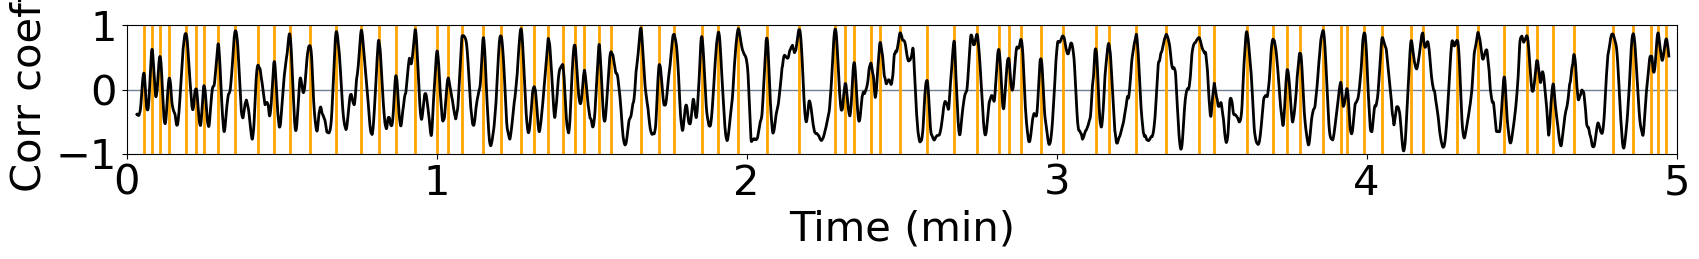

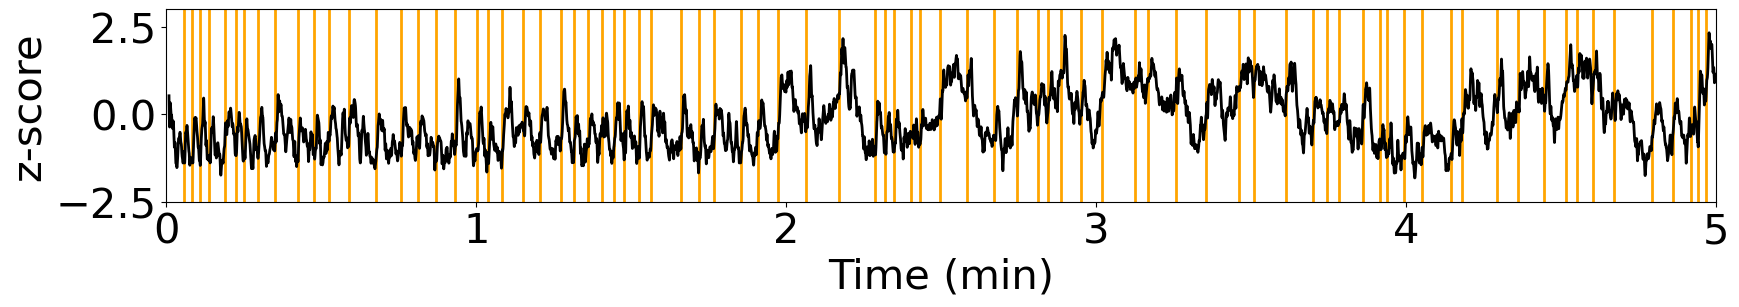

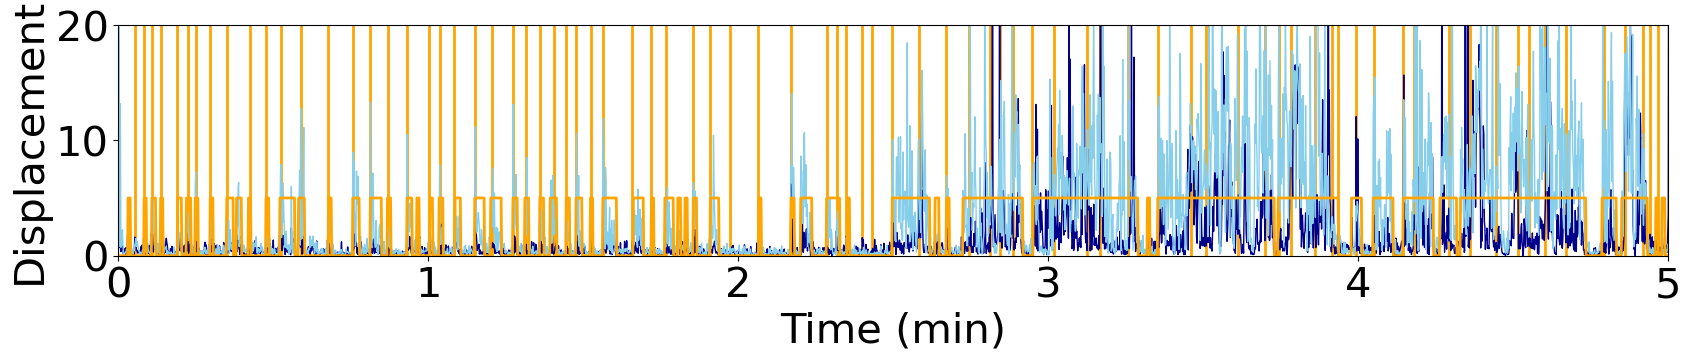

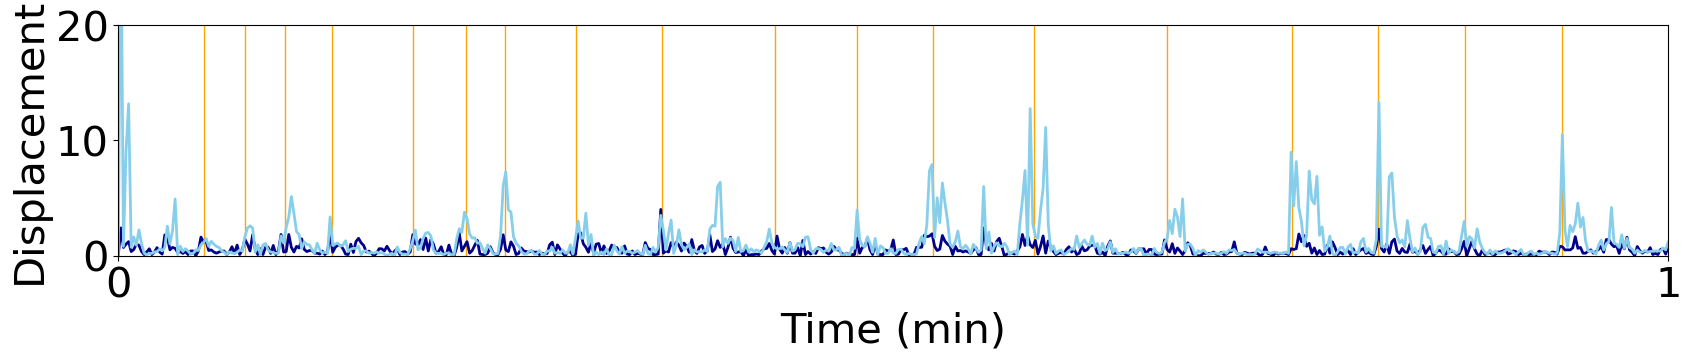

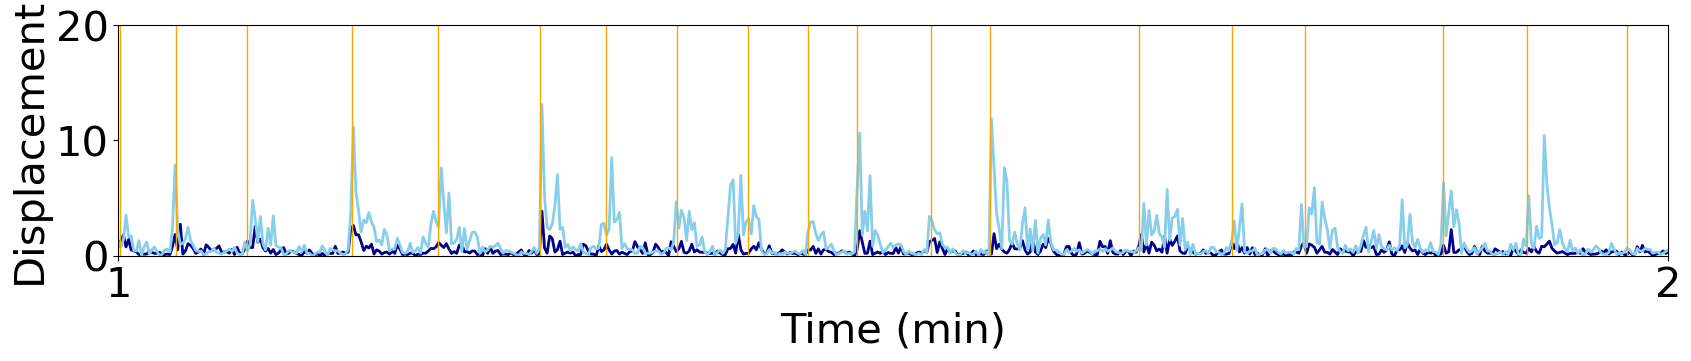

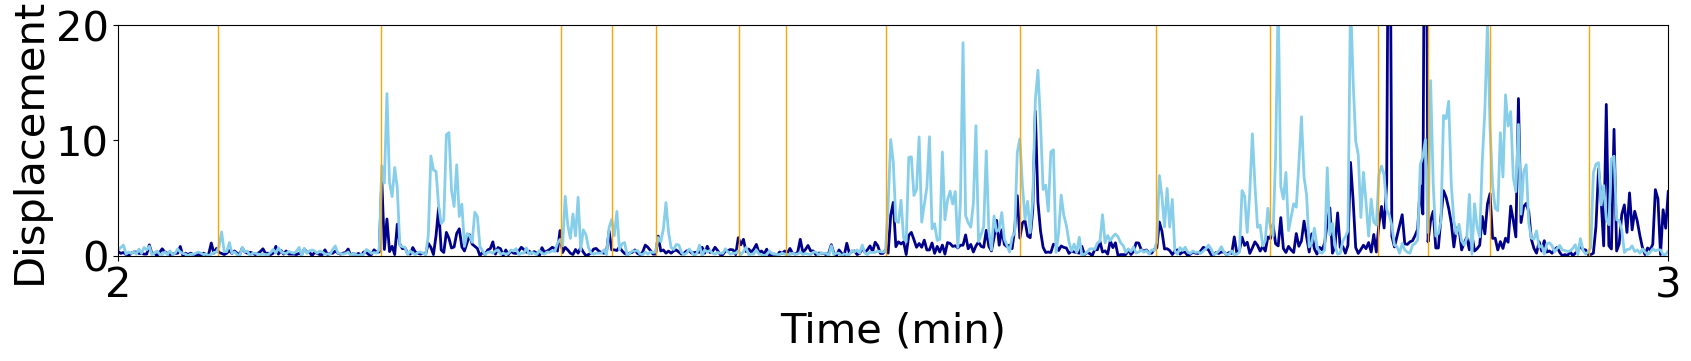

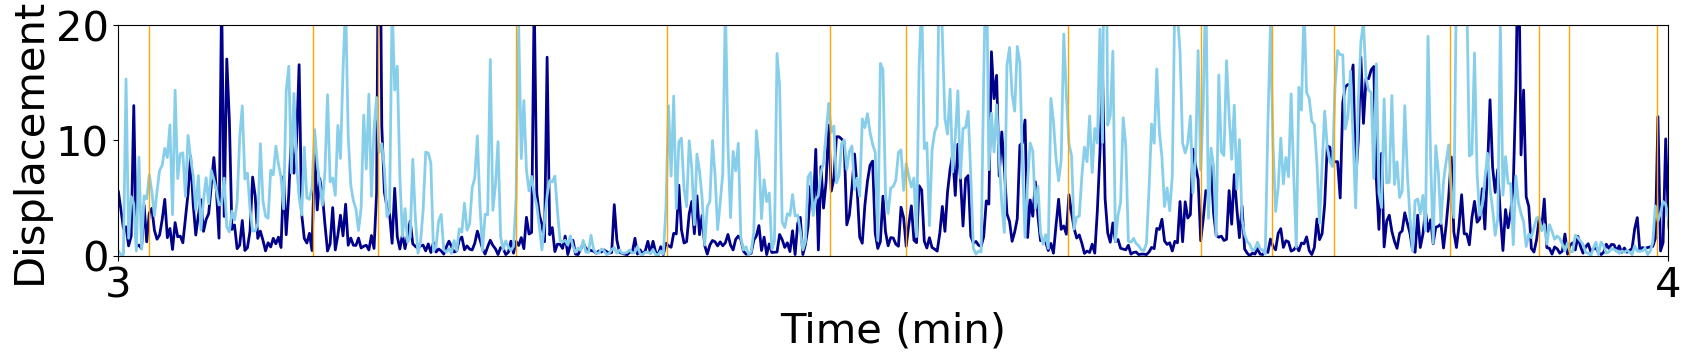

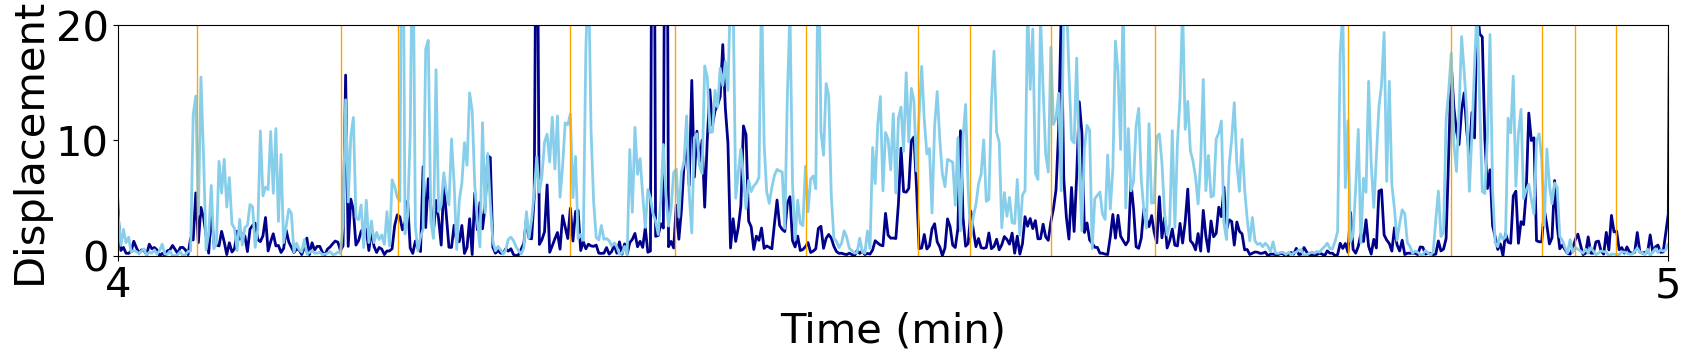

In [51]:
#Events from cross correlation peaks with the photometry and movement plots
PATH = '/home/li/Documents/Template_matching/Archived/'
all_movement_bin = np.load(PATH+"20241220_all_movement_bin.npy")

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1
yint_2=1

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
time_data = [x+analysis_window[0] for x in temp]
time_data_min = [x/60 for x in time_data]
scaled_movement_bin = [1*x/10-1 for x in all_movement_bin]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2*2/3))
ax2.axhline(0, color='slategray', linewidth=1)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
#ax2.plot(time_data_min, corr_coeff[pruned_peaks], ".", markersize=10, color='firebrick')
ax2.plot(time_data_min, corr_coeff, color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_graph_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
ymin_2=-2.5
ymax_2=3
yint_2=2.5

scaled_movement_bin = [5*x/10-5 for x in all_movement_bin]
time_470_min = [x/60 for x in time_470]
behave_time_min = [x/60 for x in behave_time]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(time_470_min[::10], dF_F[::10], color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('z-score', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_photometry_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
ymin_2=0
ymax_2=20
yint_2=10

scaled_movement_bin = [x for x in all_movement_bin]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=1)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=1)
ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Zoomed in plot
#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=1
ymin_2=0
ymax_2=20
yint_2=10

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=1
xmax=2
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=2
xmax=3
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=3
xmax=4
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=4
xmax=5
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

# Movement offset

Analysis window: [ 2.0 , 1.5 ]
Template array size:  3561
Photometry array size:  305175
Template array size after reduction:  357
Photometry array size after reduction:  30518
Correlation array size: 30161
peaks:  109


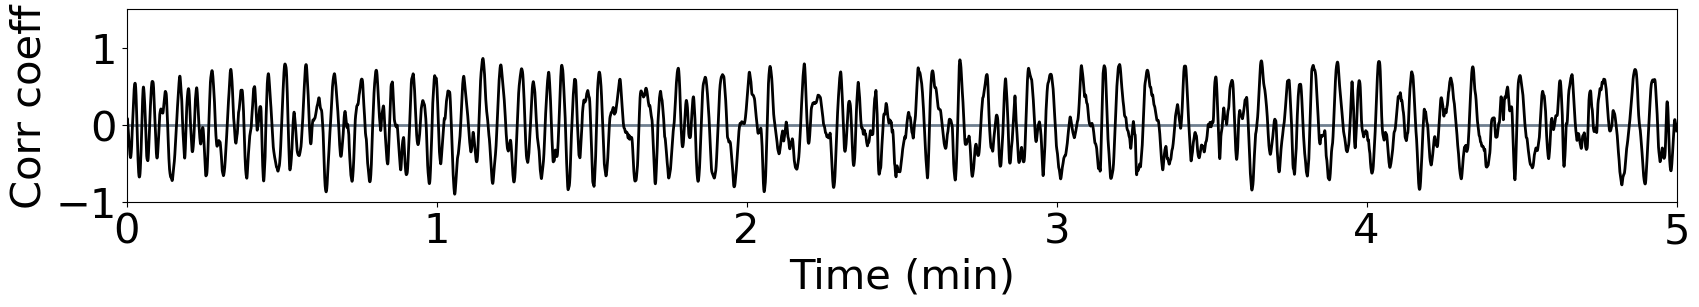

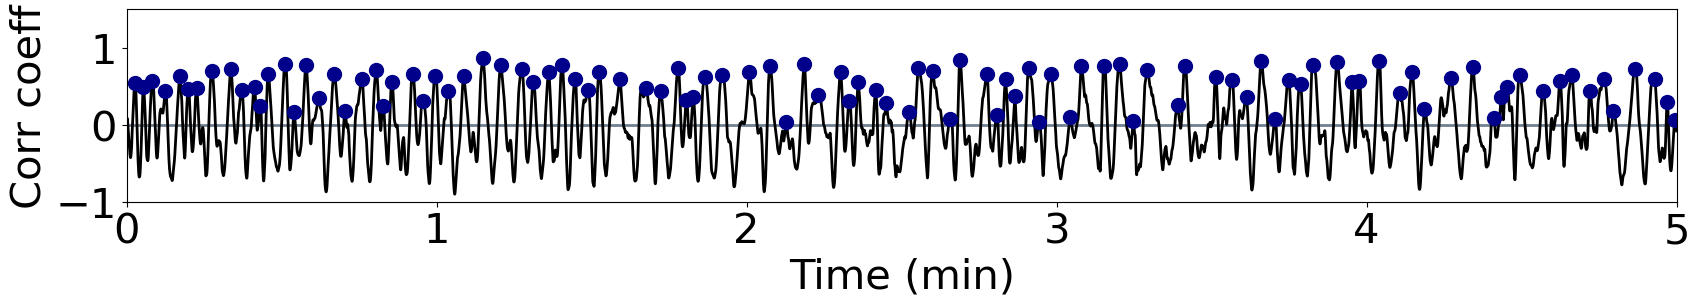

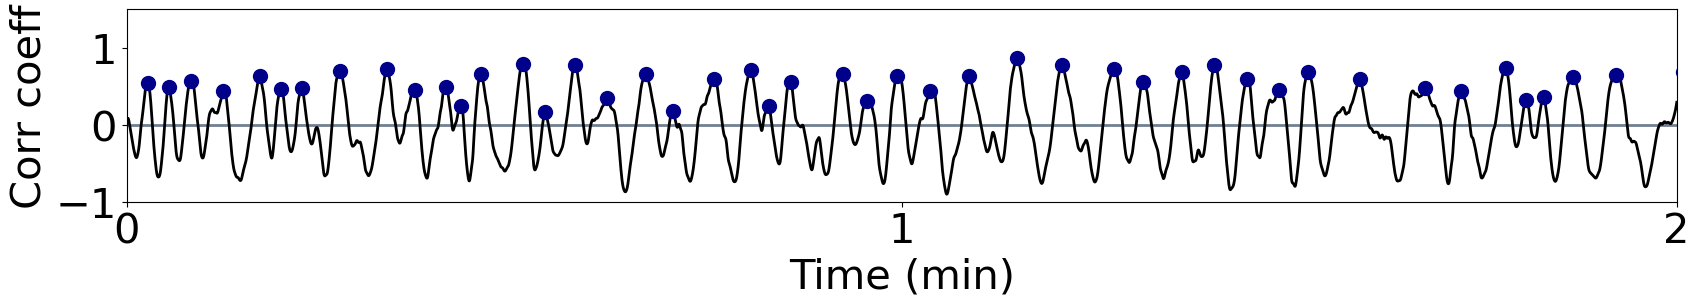

In [65]:
import numpy as np
import scipy.stats  

#Template name should remain the same characters to be read by analysis window
template_name = "/home/li/Documents/Template_matching/20241220_arrest_template_2_0_1_5.npy"
template = np.load(template_name)
analysis_window = [float(template_name[-11]+'.'+template_name[-9]),float(template_name[-7]+'.'+template_name[-5])]
print("Analysis window: [", analysis_window[0],",", analysis_window[1],"]")
hi_cutoff = 300 #s This is where the template matching stops, so 300 means template runs from 0 to 300s
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("Template array size: ", len(template))
print("Photometry array size: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("Template array size after reduction: ", len(sig1))
print("Photometry array size after reduction: ", len(sig2))

scales = [1] #Cross correlation is scaling independent
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Correlation array size:", len(corr_coeff_scaled))

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=100, prominence=0.25)
event3_times = []
print("peaks: ", len(peaks))

#shifting time to be compatible with template
temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
time_data = [x+analysis_window[0] for x in temp]

for i in range(len(peaks)):
    event3_times.append(time_data[peaks[i]])
#endfor i

#Cutoff for peak detection
pruned_peaks=[]
corr_cutoff=0
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1
plot_width = 20
plot_height = 2.5

pruned_peaks_min = [x/6000 for x in pruned_peaks]
time_min = []
for i in range(len(corr_coeff)):
    time_min.append(i/6000)
#endfor i

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=20, color='darkblue')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_photometry_template_crosscorrelate.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Zoomed in plot
xmin=0
xmax=2
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=20, color='darkblue')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_photometry_template_crosscorrelate_zoom_1.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Find the corresponding times to filtered peak events
event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i
np.save("20241220_arrest_peaks.npy",peaks)
np.save("20241220_arrest_peaks_corr_coeff.npy",corr_coeff)
np.save("20241220_arrest_time_data.npy",time_data)
np.save("20241220_arrest_peak_times.npy",event3_times)

Event-associated movement and photometry signals
Behave mean array 3 size:  150
Activity mean array 3 size:  15258
Plot movement onset...


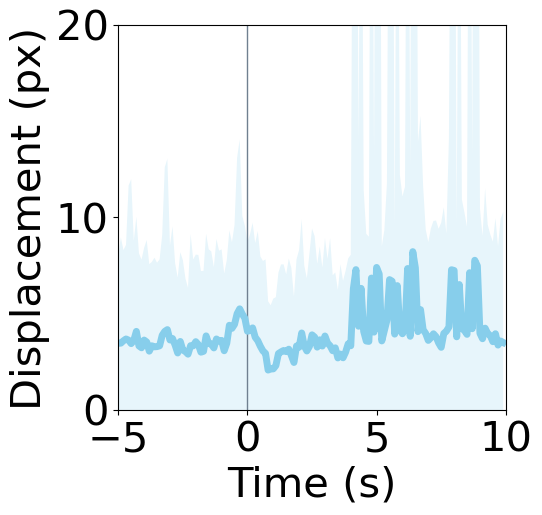

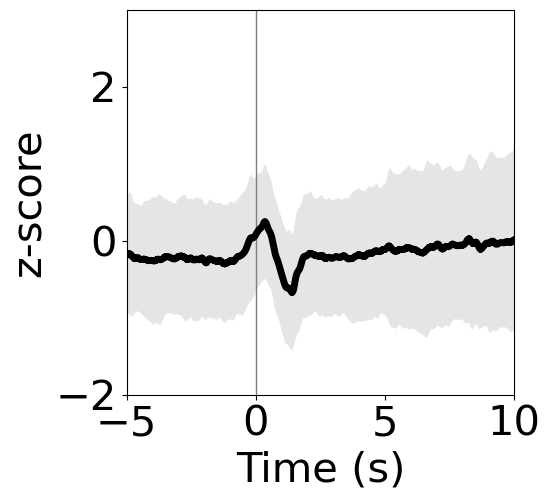

In [46]:
#Photometry and movement traces associated with template-matched events
import numpy as np  # package for scientific computing, handles arrays and math
from operator import add

marker_dist = [nose_dist, tailBase_dist]
pre_window_size = 5 # in second
post_window_size = 10 # in second
print("\033[1m"+"Event-associated movement and photometry signals"+"\033[0m")
behave_mean3_marker1_array = []
activity_mean3_array = []
behave_data3_marker1 = []
activity_data3=[]
behave_interval_time = []
activity_interval_time = []
behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)]) #behave_time
activity_interval=int((pre_window_size+post_window_size)*freq_470) #calculate activity interval
activity_interval_time.append(time_470[0:activity_interval]) #activity_time
behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]] #re-align to 0
activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]] #realign to 0

for j in range(len(event3_times)):
    if(event3_times[j]-pre_window_size>0 and event3_times[j]+post_window_size<behave_time[-1]):
        activity_data3.append(np.around(dF_F[int((event3_times[j]-pre_window_size)*freq_470):int((event3_times[j]+post_window_size)*freq_470-1)],2))
        behave_data3_marker1.append(marker_dist[0][int((event3_times[j]-pre_window_size)*frate):int((event3_times[j]+post_window_size)*frate)])
    #endif
#endfor j

behave_mean3_marker1=[]
behave_std3_marker1=[]
behave_data3_transposed_marker1 = np.transpose(np.array(behave_data3_marker1))
for i in range(len(behave_data3_transposed_marker1)):    
    behave_mean3_marker1.append(np.nanmean(behave_data3_transposed_marker1[i]))
    behave_std3_marker1.append(np.nanstd(behave_data3_transposed_marker1[i]))
#end for i
                
behave_mean3_marker1_array = behave_mean3_marker1
behave_std3_marker1_array = behave_std3_marker1
  
print("Behave mean array 3 size: ", len(behave_mean3_marker1))
        
activity_mean3=[]
activity_std3=[]
activity_data3_transposed=np.transpose(np.array(activity_data3))
for i in range(len(activity_data3_transposed)):    
    activity_mean3.append(np.nanmean(activity_data3_transposed[i]))
    activity_std3.append(np.nanstd(activity_data3_transposed[i]))            
#end for i
    
activity_mean3_array = activity_mean3
activity_std3_array = activity_std3

print("Activity mean array 3 size: ", len(activity_mean3))


#Plot behavior, activity events
#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 20
ymin_5 = -2
ymax_5 = 3
j=0

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"Plot movement offset..."+"\033[0m")
#for j in range(len(behave_data)):
temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean_array=behave_mean3_marker1_array #add two markers together
behave_std_array = behave_std3_marker1_array
ax4.axvline(0, color='slategray', linewidth=1)
ax4.plot(behave_interval_time[0],behave_mean_array, color='skyblue', linewidth=5)
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_array,behave_std_array)), list(map(operator.sub,behave_mean_array,behave_std_array)), facecolor='skyblue', alpha=0.2)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_behavior_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_HEAD_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax6.axvline(0, color='slategray', linewidth=1)
ax6.plot(activity_interval_time[0],activity_mean3_array, color='black', linewidth=5)
ax6.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean3_array,activity_std3_array)), list(map(operator.sub,activity_mean3_array,activity_std3_array)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
#ax6.axvline(0, color='slategray', linewidth=3)
#ax6.axhline(0, color='slategray', linewidth=3)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_activity_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()
 

delay:  -236.48584111028316


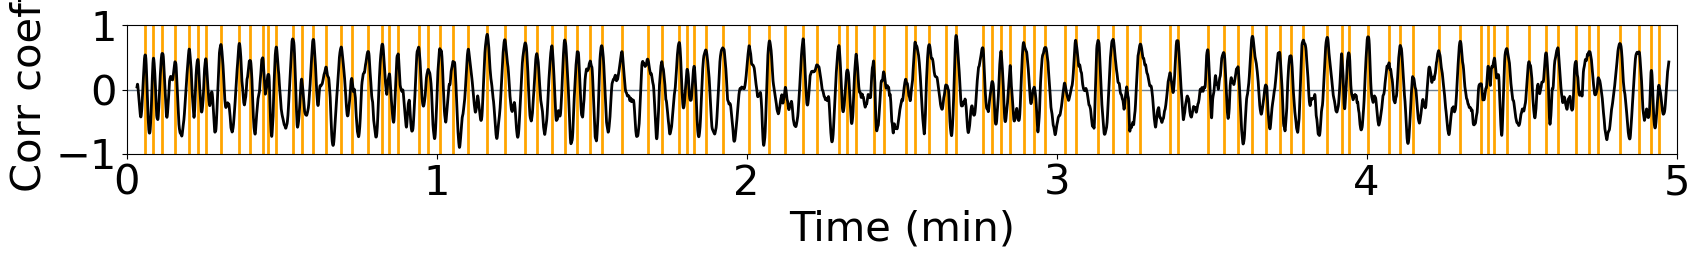

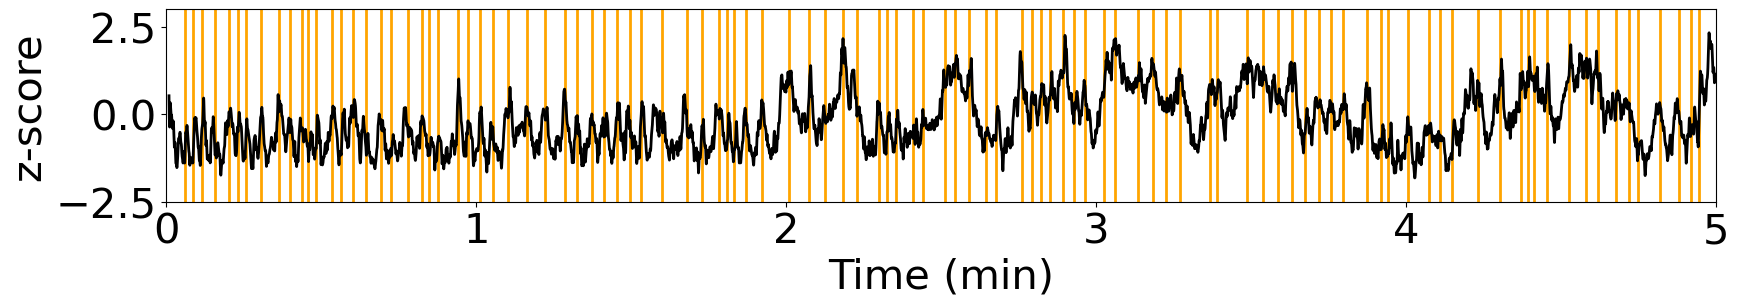

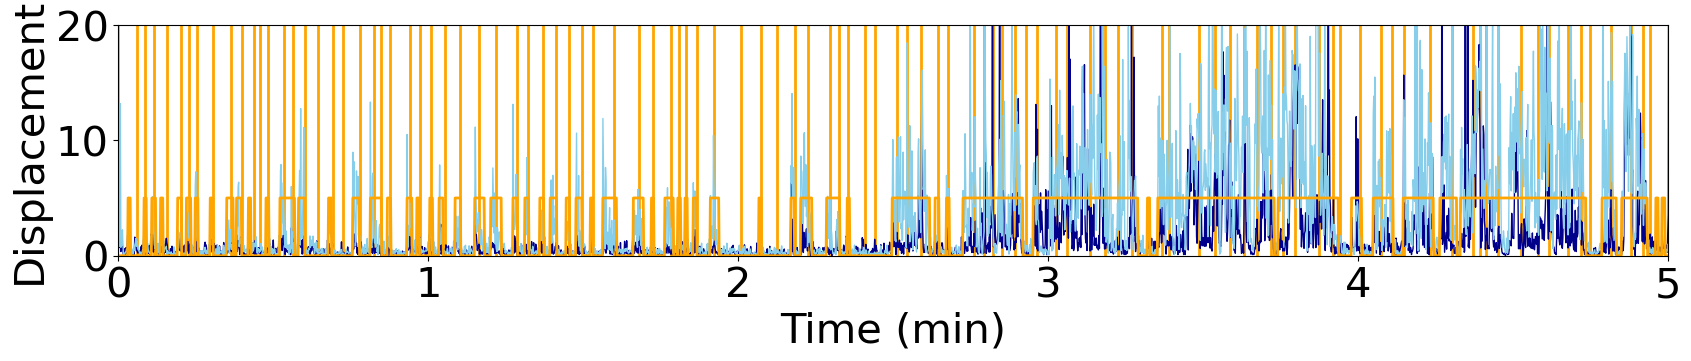

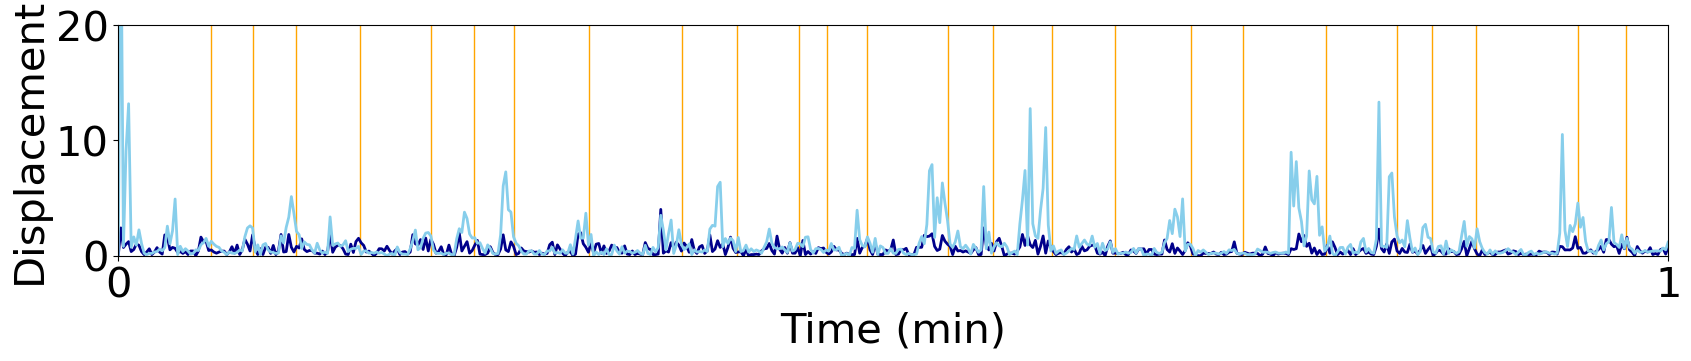

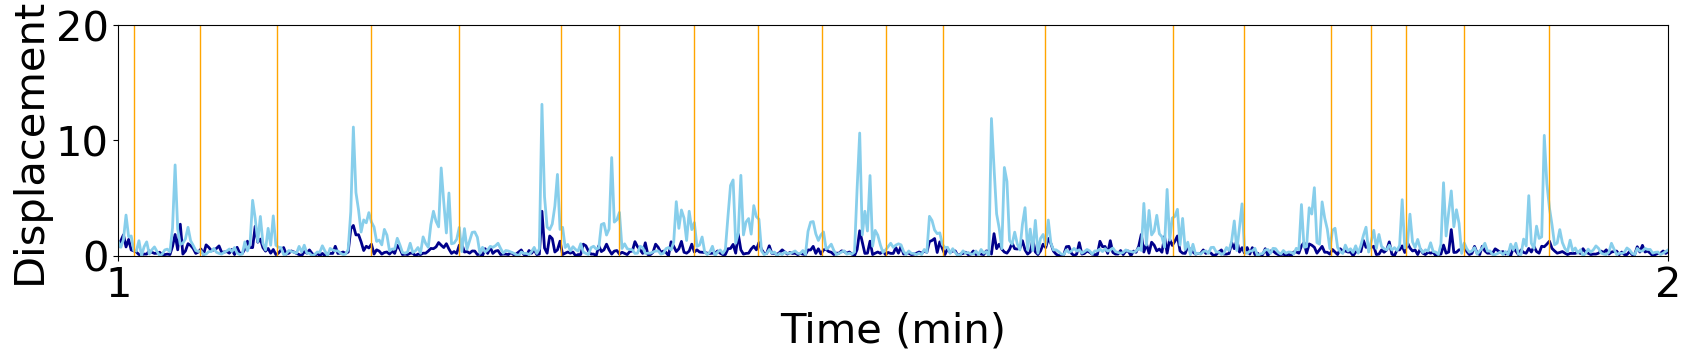

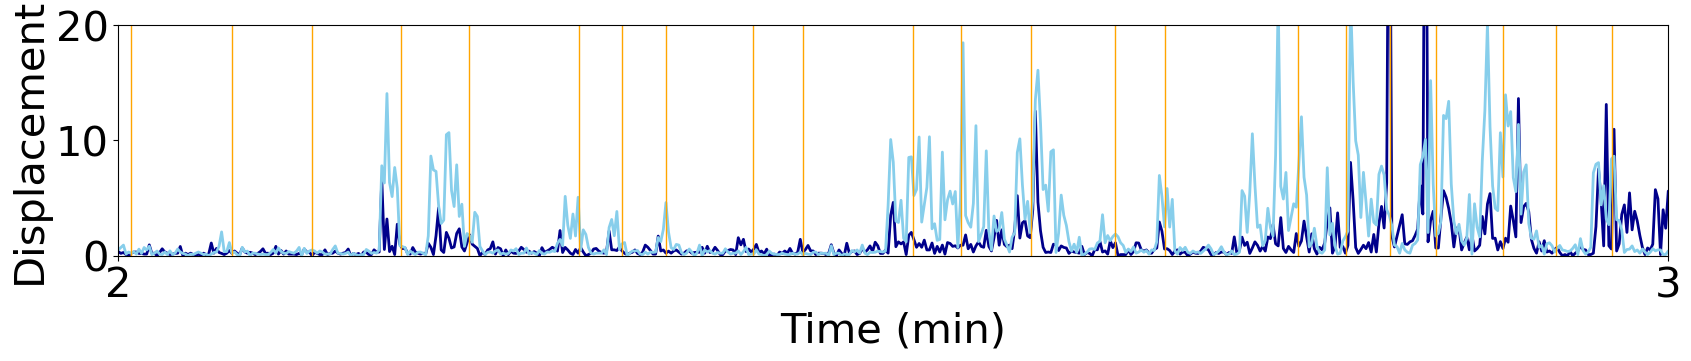

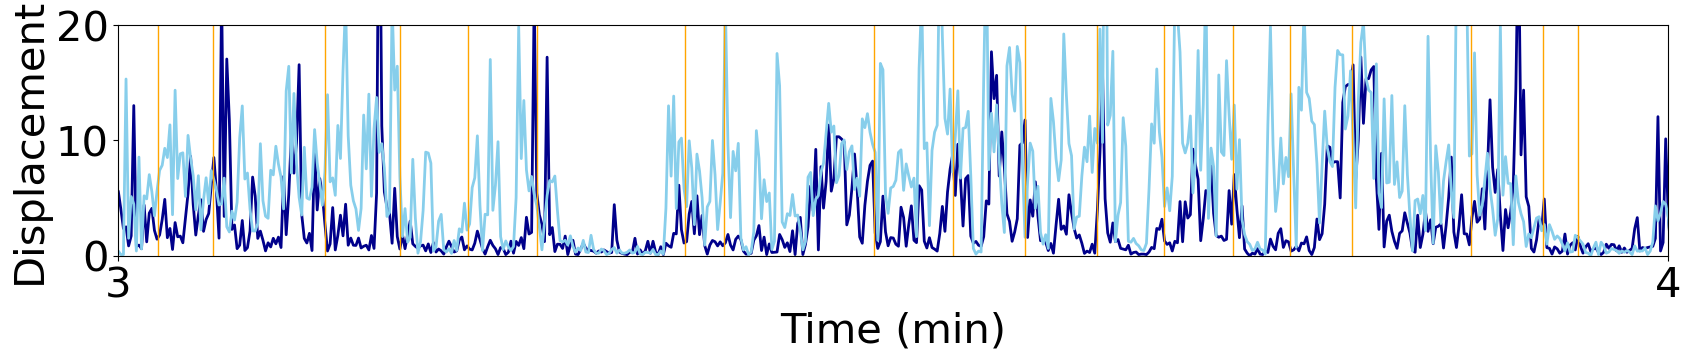

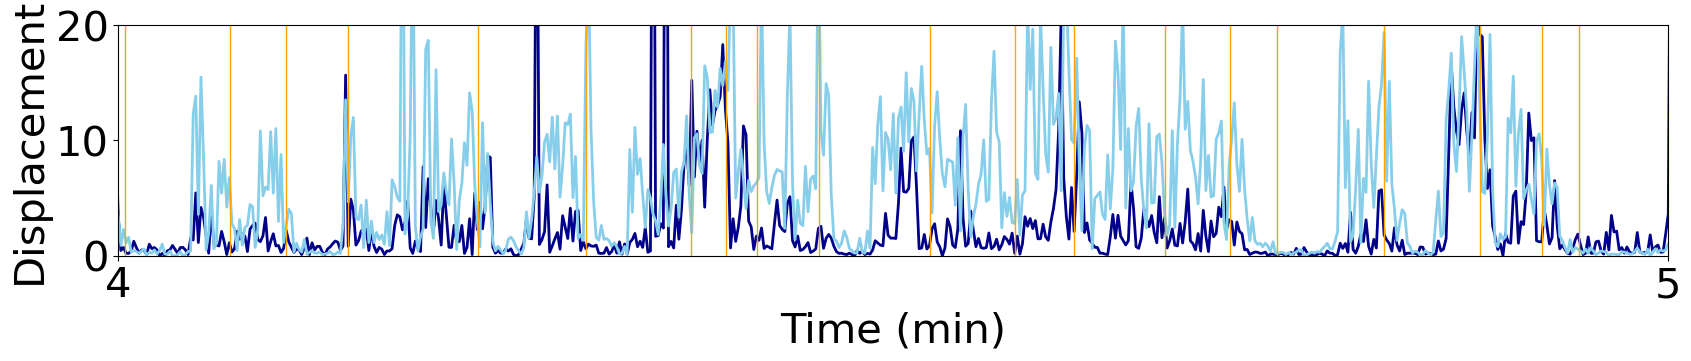

In [47]:
#Events from cross correlation peaks with the photometry and movement plots
PATH = '/home/li/Documents/Template_matching/Archived/'
all_movement_bin = np.load(PATH+"20241220_all_movement_bin.npy")

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1
yint_2=1

#shift time to be compatible with template
temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
time_data = [x+analysis_window[0] for x in temp]
time_data_min = [x/60 for x in time_data]
scaled_movement_bin = [1*x/10-1 for x in all_movement_bin]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2*2/3))
ax2.axhline(0, color='slategray', linewidth=1)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
#ax2.plot(time_data_min, corr_coeff[pruned_peaks], ".", markersize=10, color='firebrick')
ax2.plot(time_data_min, corr_coeff, color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_graph_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
ymin_2=-2.5
ymax_2=3
yint_2=2.5

scaled_movement_bin = [5*x/10-5 for x in all_movement_bin]
time_470_min = [x/60 for x in time_470]
behave_time_min = [x/60 for x in behave_time]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(time_470_min[::10], dF_F[::10], color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('z-score', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_photometry_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
ymin_2=0
ymax_2=20
yint_2=10

scaled_movement_bin = [x for x in all_movement_bin]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=1)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=1)
ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#Zoomed in plot
#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
xmin=0
xmax=1
ymin_2=0
ymax_2=20
yint_2=10

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=1
xmax=2
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=2
xmax=3
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=3
xmax=4
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

xmin=4
xmax=5
fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.plot(behave_time_min, marker_dist[1], color='darkblue',linewidth=2)
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=2)
#ax2.plot(behave_time_min, all_movement_bin, color='orange',linewidth=2)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange', linewidth=1)
#endfor i
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()